In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
df = pd.read_csv("processed_results.csv", low_memory=False)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date')
df.head(10000)

,Date,Surface,Best of,Player0,Player1,0Rank,1Rank,PS0,PS1,B3650,B3651,elo_0,elo_1,winner
0,2004-01-05,Hard,3,Kiefer N.,Ulihrach B.,58,246,1.719,2.210,1.615,2.200,1618.182210,1486.195239,1
1,2004-01-05,Hard,3,Schuettler R.,Youzhny M.,6,43,1.385,3.250,1.364,2.875,1820.759485,1615.057648,1
2,2004-01-05,Hard,3,Sargsian S.,Carraz G.,39,67,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0
3,2004-01-05,Hard,3,Lisnard J.R.,Pless K.,97,440,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0
4,2004-01-05,Hard,3,Portas A.,Levy H.,85,111,2.360,1.641,2.250,1.570,1418.621881,1401.283125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2007-08-07,Hard,3,Grosjean S.,Youzhny M.,73,13,2.800,1.513,2.620,1.440,1608.225548,1779.257917,1
9996,2007-08-07,Hard,3,Canas G.,Mathieu P.H.,15,23,1.800,2.150,1.660,2.100,1800.385698,1820.656479,1
9997,2007-08-07,Hard,3,Odesnik W.,Ljubicic I.,182,11,4.850,1.235,4.500,1.160,1444.582060,1791.184091,0
9998,2007-08-07,Hard,3,Benneteau J.,Nieminen J.,59,27,2.800,1.513,2.620,1.440,1571.360070,1694.510434,1


In [3]:
len(df)

32343

In [4]:
#leaving around 15% of data out of the model for later model retraining
model_data = df[:27500]
later_update_data = df[27500:]

In [5]:
X = model_data.drop(['Date', 'Surface', 'Player0' , 'Player1', 'winner' ], axis=1)
y = model_data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7003636363636364


In [7]:
# Added KFold to check overfitting
k = 5
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

for fold_idx, score in enumerate(scores):
    print(f"Fold {fold_idx + 1}: Accuracy = {score}")

average_score = scores.mean()
print("Average Accuracy:", average_score)

Fold 1: Accuracy = 0.6905454545454546
Fold 2: Accuracy = 0.7052727272727273
Fold 3: Accuracy = 0.708
Fold 4: Accuracy = 0.7154545454545455
Fold 5: Accuracy = 0.7067272727272728
Average Accuracy: 0.7051999999999999


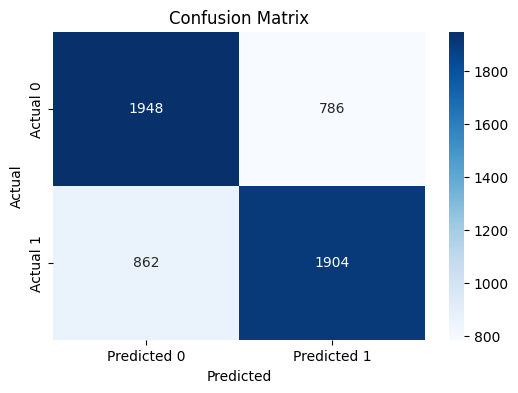

In [8]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7003636363636364
Precision: 0.7078066914498141
Recall: 0.6883586406362979
F1-score: 0.6979472140762463
ROC AUC: 0.7004338923737452


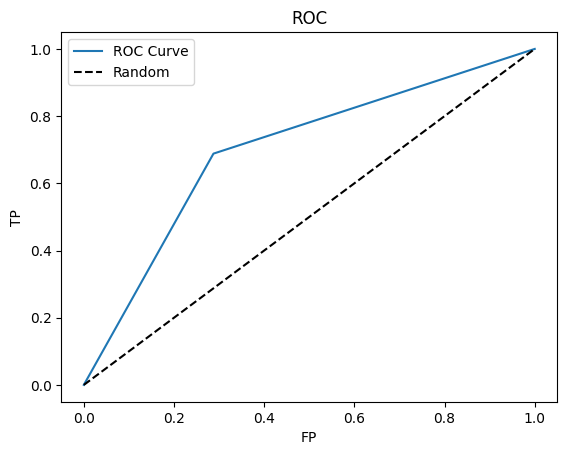

In [9]:
#Other eval metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC')
plt.legend()
plt.show()